In [5]:
from MASS import MASS, get_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
df=pd.read_excel('../Data/summary_2ndEdition.xlsx', sheet_name='Sheet1', index_col='strain')  # ,index_col='strain',index_col='Mutant'
cs=pd.read_excel('../Data/summary_2ndEdition.xlsx', sheet_name='Sheet2')

print('df.shape',df.shape)
df = df.drop(df.query("strain == 'dummyVars'").index)
df=df[cs['carbon_source']]
df[df=='D']=1
df[df=='V']=1
df[df=='W']=1
df[df=='+']=2
df[df=='-']=0
df[df=='?']=None
df = df.dropna(axis=0, how='any')
print('df.shape',df.shape)
df = df[df.columns.sort_values()]
df.head()

df.shape (591, 91)
df.shape (462, 38)


,2-Keto-D-gluconate growth,"Butane 2,3 diol growth",Cellobiose growth,Citrate growth,D-Arabinose growth,D-Galactose growth,D-Galacturonate growth,D-Gluconate growth,"D-Glucono-1,5-lactone growth",D-Glucoronate growth,...,Methanol growth,"Propane 1,2 diol growth",Raffinose growth,Ribitol growth,Starch growth,Succinate growth,Sucrose growth,Xylitol growth,"a,a-Trehalose growth",myo-Inositol growth
strain,,,,,,,,,,,,,,,,,,,,,
Aciculoconidium aculeatum,2,0,2,2,0,0,0,0,0,0,...,0,0,0,1,1,2,2,0,2,0
Ambrosiozyma cicatricosa,2,0,2,2,0,0,0,0,1,0,...,0,0,0,2,0,2,2,2,2,0
Ambrosiozyma monospora,0,0,2,1,0,0,0,0,1,0,...,0,1,0,2,0,2,2,2,2,0
Arthroascus schoenii,0,0,0,0,0,0,2,0,0,0,...,0,1,0,0,1,2,1,0,1,0
Arxiozyma telluris,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
def high_corr(df, thres=0.8):
    corr_matrix_raw = df.corr(method='spearman')
    corr_matrix = corr_matrix_raw.abs()
    high_corr_var_=np.where(corr_matrix>thres)
    high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y], corr_matrix_raw.iloc[x,y]) for x,y in zip(*high_corr_var_) if x!=y and x<y]
    return high_corr_var
high_corr(df, thres=0.7)
# [('Cellobiose growth', 'Salicin growth', 0.8264618665542552)]

# [('Maltose growth', 'Melezitose growth', 0.81593074018472),
#  ('Cellobiose growth', 'Salicin growth', 0.8264618665542552),
#  ('Cellobiose growth', 'Arbutin growth', 0.8301436222203571),
#  ('Salicin growth', 'Arbutin growth', 0.8833891507800501)]

[('L-Arabinitol growth', 'L-Arabinose growth', 0.7106935486146917),
 ('Maltose growth', 'Sucrose growth', 0.7166613238822656)]

In [8]:
df.dropna().shape, df.shape,df.dropna(axis='columns').shape

((462, 38), (462, 38), (462, 38))

In [11]:
# rename columns
df.columns = df.columns.str.replace(' growth','')
df.describe()

,2-Keto-D-gluconate,"Butane 2,3 diol",Cellobiose,Citrate,D-Arabinose,D-Galactose,D-Galacturonate,D-Gluconate,"D-Glucono-1,5-lactone",D-Glucoronate,...,Methanol,"Propane 1,2 diol",Raffinose,Ribitol,Starch,Succinate,Sucrose,Xylitol,"a,a-Trehalose",myo-Inositol
count,462,462,462,462,462,462,462,462,462,462,...,462,462,462,462,462,462,462,462,462,462
unique,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,2,0,2,2,0,2,0,0,2,0,...,0,0,0,2,0,2,2,2,2,0
freq,202,362,263,238,260,208,371,163,207,336,...,437,281,273,174,320,331,269,188,277,390


In [12]:
pd.value_counts(df.values.ravel(), dropna=False)

0    8487
2    5979
1    3090
Name: count, dtype: int64

## some samples are constant

In [13]:
# np.floor(1.5)
(df.std(axis=1)==0).mean()

0.0021645021645021645

In [14]:
# for col in df:
#     print(df[col].value_counts())
cat_col=df.columns
df_new=pd.get_dummies(df,columns=cat_col,drop_first=True)
df_new.shape

(462, 76)

In [15]:
# df.corr()
def high_corr(df, thres=0.8):
    corr_matrix_raw = df.corr(method='spearman')
    corr_matrix = corr_matrix_raw.abs()
    high_corr_var_=np.where(corr_matrix>thres)
    high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y], corr_matrix_raw.iloc[x,y]) for x,y in zip(*high_corr_var_) if x!=y and x<y]
    return high_corr_var
high_corr(df_new, thres=0.6)

[('D-Glucono-1,5-lactone_1', 'D-Glucono-1,5-lactone_2', -0.7003150551506002),
 ('D-Glucose_1', 'D-Glucose_2', -0.9524072899855919),
 ('D-Mannitol_1', 'D-Mannitol_2', -0.6412230352493762),
 ('D-Xylose_1', 'D-Xylose_2', -0.6106748086996268),
 ('Ethanol_1', 'Ethanol_2', -0.7186339009602783),
 ('Glycerol_1', 'Glycerol_2', -0.7513963743624413),
 ('L-Arabinitol_2', 'Xylitol_2', 0.6024189774676874),
 ('Maltose_2', 'Sucrose_2', 0.7025010629843772),
 ('Succinate_1', 'Succinate_2', -0.7108751729033598)]

In [16]:
df_new=df_new.astype(float)
X=df_new.values
n, d = X.shape  
# r=14#15#2
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X=scaler.fit_transform(X)
# (X==2).mean()
X[X==0]=-1
X.dtype##dtype('int64') 

dtype('float64')

In [17]:
names=df.columns.values
names2=df_new.columns.values
names2

array(['2-Keto-D-gluconate_1', '2-Keto-D-gluconate_2',
       'Butane 2,3 diol_1', 'Butane 2,3 diol_2', 'Cellobiose_1',
       'Cellobiose_2', 'Citrate_1', 'Citrate_2', 'D-Arabinose_1',
       'D-Arabinose_2', 'D-Galactose_1', 'D-Galactose_2',
       'D-Galacturonate_1', 'D-Galacturonate_2', 'D-Gluconate_1',
       'D-Gluconate_2', 'D-Glucono-1,5-lactone_1',
       'D-Glucono-1,5-lactone_2', 'D-Glucoronate_1', 'D-Glucoronate_2',
       'D-Glucosamine_1', 'D-Glucosamine_2', 'D-Glucose_1', 'D-Glucose_2',
       'D-Mannitol_1', 'D-Mannitol_2', 'D-Ribose_1', 'D-Ribose_2',
       'D-Xylose_1', 'D-Xylose_2', 'DL-Lactate_1', 'DL-Lactate_2',
       'Erythritol_1', 'Erythritol_2', 'Ethanol_1', 'Ethanol_2',
       'Galactitol_1', 'Galactitol_2', 'Glycerol_1', 'Glycerol_2',
       'Inulin_1', 'Inulin_2', 'L-Arabinitol_1', 'L-Arabinitol_2',
       'L-Arabinose_1', 'L-Arabinose_2', 'L-Rhamnose_1', 'L-Rhamnose_2',
       'L-Sorbose_1', 'L-Sorbose_2', 'Lactose_1', 'Lactose_2',
       'Maltose_1', 'Ma

## MASS

['D-Glucose_1.0', 'D-Glucose_2.0', 'Inulin_1.0', 'Inulin_2.0',
        'myo-Inositol_1.0', 'myo-Inositol_2.0', 'Methanol_1.0',
        'Methanol_2.0']
        


### fast and monotone to solve 

In [ ]:
# list(range(10,0,-1))
# len(range(d-1,0,-1)),d
# df_z_all=pd.read_csv('MIP_result_z_all38_fast.csv')
# df_z_all=pd.read_csv('MIP_result_z_all38_greedy2.csv')
# df_z_all

In [ ]:
my_range=range(d-2,0,-2)#range(d-1,0,-1)
my_l=len(my_range)#d-1#37
myseed = 2020
r = np.random.RandomState([myseed])

In [ ]:
# obj_all=np.zeros((my_l, ))
# obj_all_test=np.zeros((my_l, ))
# r2_score_=np.zeros((my_l, ))
# # r2_score_test=np.zeros((my_l, ))
# f1_score_micro=np.zeros((my_l, ))
# # f1_score_micro_test=np.zeros((my_l, ))
# accuracy=np.zeros((my_l, ))
# accuracy_test=np.zeros((my_l, ))
# wmse=np.zeros((my_l, ))
z_all=[]
B_all=[]
obj_all=[]

z_start68=np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1])
z_prev=z_start68
for r in my_range:    
#     z_start_= df_z_all.loc[d-1-r,:].values
    print(r)
    if r>=d-8: #74,72,70,68
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_start=z_start68,lamda=0)
  #         bestB, bestb0, bestz , bestW = MMRP_reg(X, r, z_start=z_start_)
    elif r<8:#6,4,2
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_greedy=z_prev,n_greedy=2,lamda=0) 
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r)
    else:#66--8
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_greedy=z_prev,n_greedy=0,lamda=0)
        bestB, bestb0, bestz, bestKSI, obj,m = MASS(X, r, z_start=bestz, z_greedy=z_prev,n_greedy=2,lamda=0)
    bestz=bestz.astype(int) 
    z_prev=np.copy(bestz).astype(int) 
#         bestB, bestb0, bestz , bestW = MMRP_reg(X, r, z_start=z_start_, z_greedy=bestz)
    z_all.append(bestz)
    B_all.append(bestB)
    obj_all.append(obj)#sum( sum(abs(bestW)))
#     ## train error analysis

74
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
72
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
70
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
68
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
66
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
64
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
62
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
60
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Max: 1024  Default: 0
Changed value of parameter Threads to 30
   Prev: 0  Min: 0  Ma

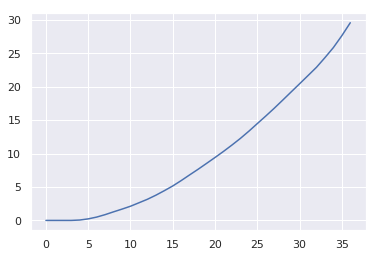

In [ ]:
pd.Series(obj_all).plot()

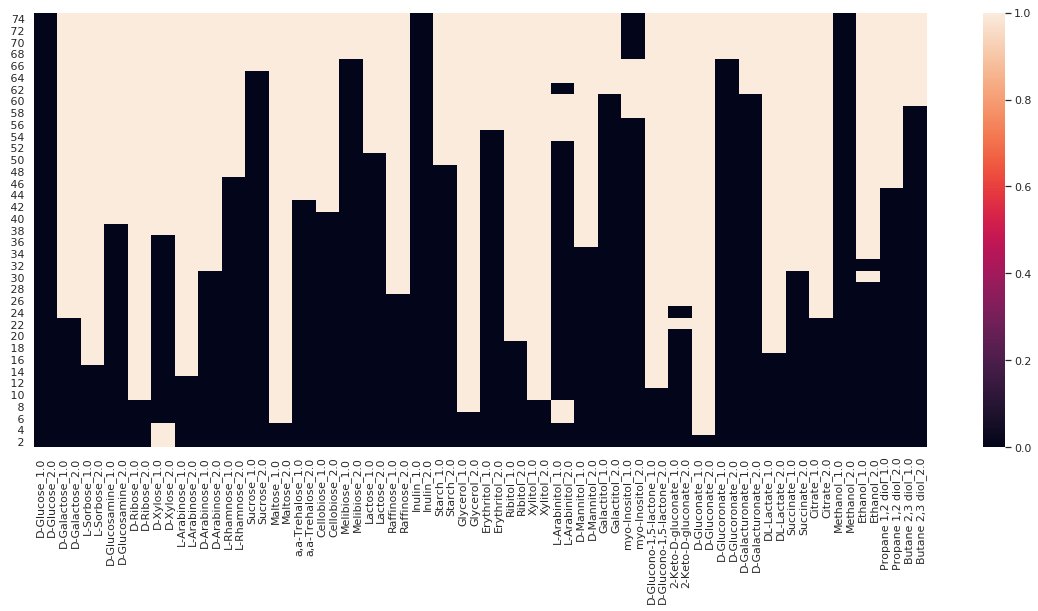

In [ ]:
str_times=', '.join([', '.join([str(char)]) for char in list(my_range)]).split(',')
# ' '.join([' '.join([str(char),str(char)]) for char in list(range(1,16))])
import seaborn as sns
plt.figure(figsize=(20,8))
sns.heatmap(np.array(z_all).astype(int), 
            xticklabels=df_new.columns.values,
            yticklabels=str_times, vmin=0, vmax=1)

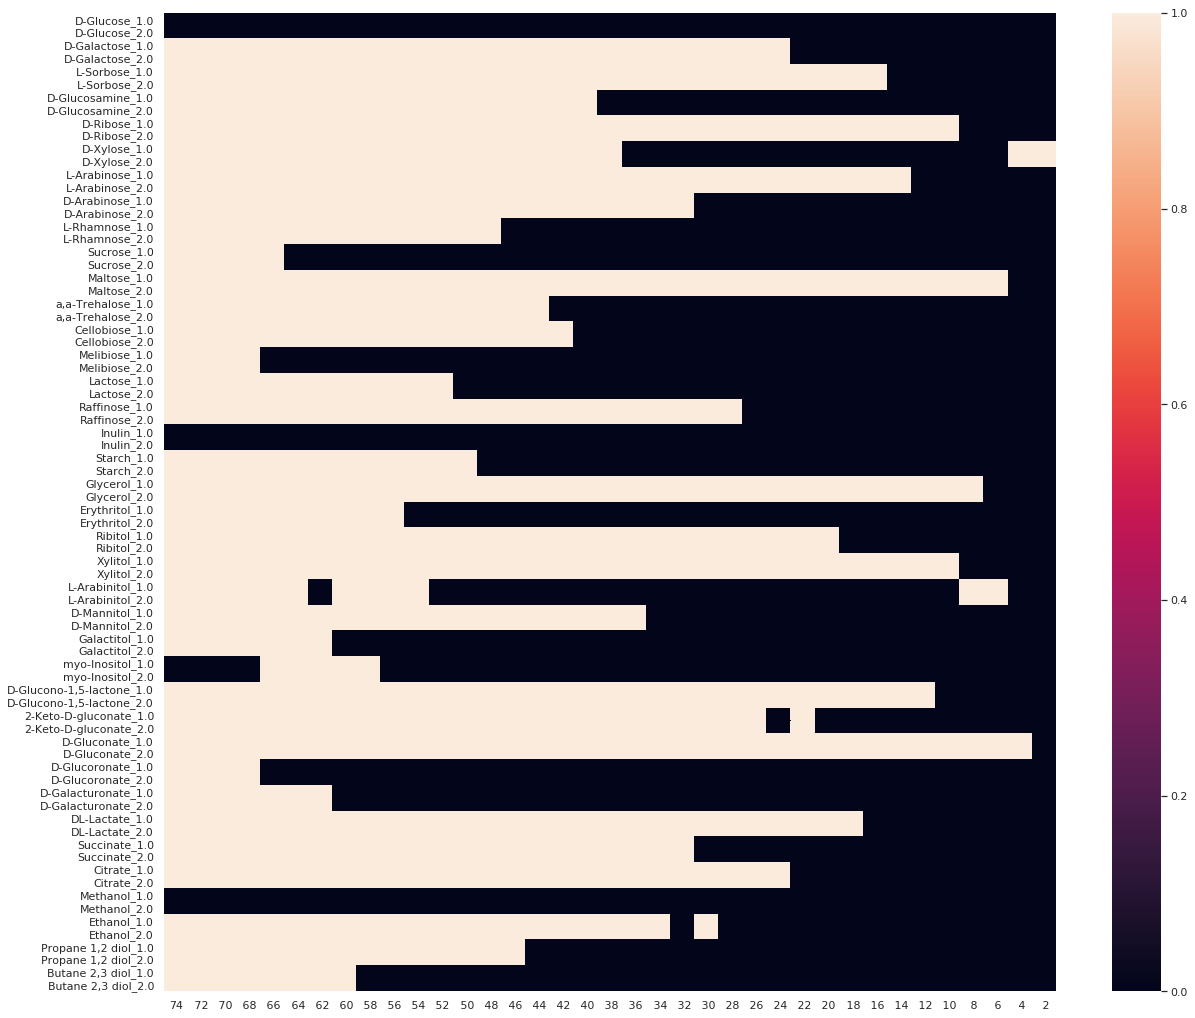

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(np.array(z_all).T.astype(int), 
            xticklabels=str_times,
            yticklabels=df_new.columns.values, vmin=0, vmax=1)

In [ ]:
# filename = 'MIP_result_z_all38_fast.npz'
# np.savez(filename, z_all=z_all)
df_z_all=pd.DataFrame.from_records(z_all, columns=df_new.columns)
df_z_all.to_csv('./Results/MIP_classify_z_all76_greedy2.csv',index=False)

In [ ]:
df_z_all=pd.read_csv('./Results/MIP_classify_z_all76_greedy2.csv')

# # 
# plt.figure(figsize=(10,8))
# sns.heatmap(df_z_all2-df_z_all.astype(int), 
#             xticklabels=df.columns.values,
#             yticklabels=str_times, vmin=-1, vmax=1)

In [ ]:
# z_all[0],z_all[36]
df_z_all.loc[0,:].values,df_z_all.loc[my_l-1,:].values

(array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

L-Sorbose_1.0                30
L-Sorbose_2.0                30
D-Ribose_1.0                 33
D-Ribose_2.0                 33
L-Arabinose_1.0              31
L-Arabinose_2.0              31
Maltose_1.0                  35
Maltose_2.0                  35
Glycerol_1.0                 34
Glycerol_2.0                 34
Xylitol_1.0                  33
Xylitol_2.0                  33
D-Glucono-1,5-lactone_1.0    32
D-Glucono-1,5-lactone_2.0    32
D-Gluconate_1.0              36
D-Gluconate_2.0              36
DL-Lactate_1.0               29
DL-Lactate_2.0               29
dtype: int64
D-Glucose_1.0        0
D-Glucose_2.0        0
Melibiose_1.0        4
Melibiose_2.0        4
Inulin_1.0           0
Inulin_2.0           0
D-Glucoronate_1.0    4
D-Glucoronate_2.0    4
Methanol_1.0         0
Methanol_2.0         0
dtype: int64


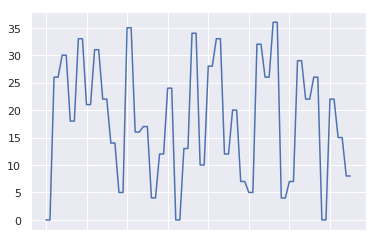

In [ ]:
df3sum=df_z_all.sum()
print(df3sum[df3sum>=30-1])
print(df3sum[df3sum<=4])
df3sum.plot()